In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_excel('boston.xls')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000


In [9]:
print(f'Data shape{df.shape}\n')
print(f'{df.isnull().sum()}\n')
print(f'{df.info()}')

Data shape(506, 14)

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


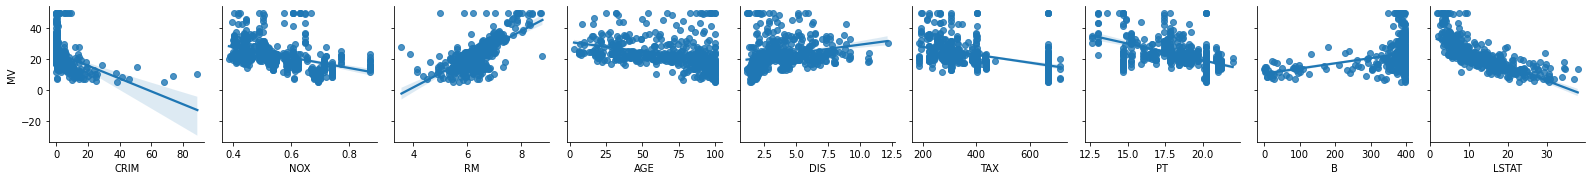

In [10]:
import seaborn as sns

sns.pairplot(df, x_vars=['CRIM','NOX','RM','AGE','DIS','TAX','PT','B','LSTAT'], y_vars=['MV'], kind='reg')
plt.show()

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


Corr shape: (14, 14)


<AxesSubplot:>

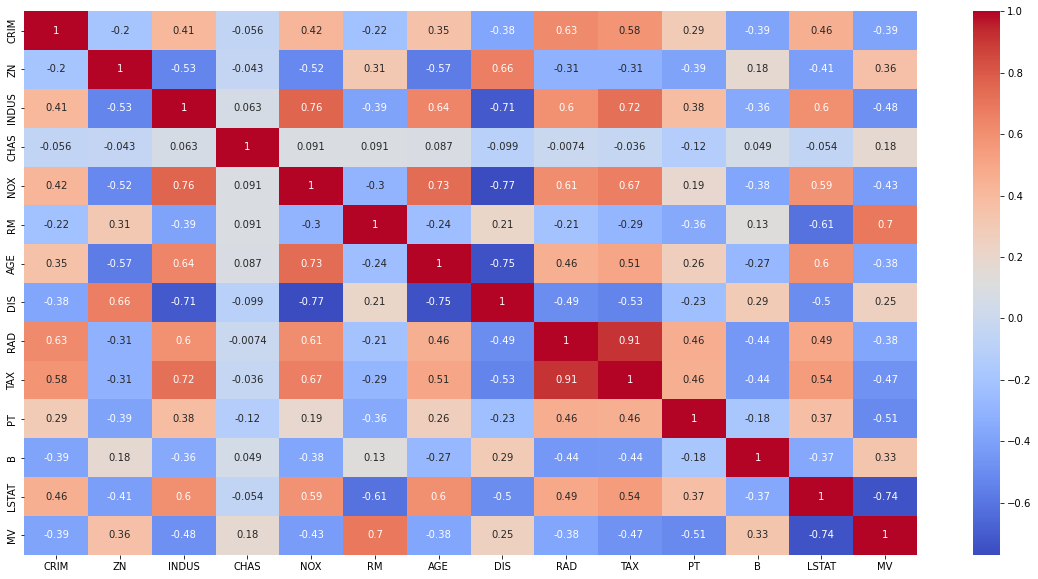

In [12]:
# Check correlation between features and plotting heatmap
corr = df.corr()
print(f'Corr shape: {corr.shape}')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [25]:
x = df.drop(columns=['MV'], axis=1)
y = df['MV']
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [26]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

print(f'x_train shape:{x_train.shape}\n')
print(f'y_train shape:{y_train.shape}\n')
print(f'x_test shape:{x_test.shape}\n')
print(f'y_test shape:{y_test.shape}\n')

x_train shape:(404, 13)

y_train shape:(404,)

x_test shape:(102, 13)

y_test shape:(102,)



In [27]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
model = LinearRegression()

# Train the model using the training sets 
model.fit(x_train, y_train)

LinearRegression()

In [28]:
# Intercept and Coefficients
print(f'Intercept:{model.intercept_}\n')

coef = pd.DataFrame([x_train.columns,model.coef_]).T
coef = coef.rename(columns={0: 'Features', 1: 'Coefficients'})
coef

Intercept:35.55487704752859



,Features,Coefficients
0,CRIM,-0.115966
1,ZN,0.047125
2,INDUS,0.00826
3,CHAS,3.234045
4,NOX,-16.686592
5,RM,3.884106
6,AGE,-0.010897
7,DIS,-1.541295
8,RAD,0.293208
9,TAX,-0.013406


In [29]:
# Model predictions on train data
y_train_pred = model.predict(x_train)

In [30]:
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'MAE: {mean_absolute_error(y_train, y_train_pred)}\n')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)}\n')
print(f'r^2 Score: {r2_score(y_train, y_train_pred)}')

MAE: 3.2269621596345375

MSE: 21.197139812403744

r^2 Score: 0.7415244236028699


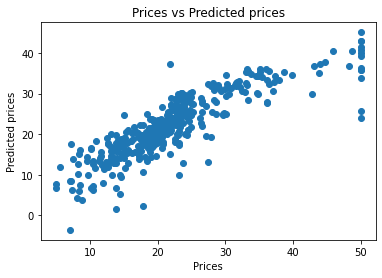

In [31]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

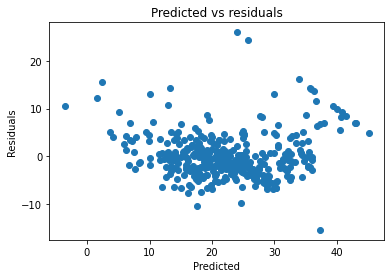

In [32]:
# Checking residuals

plt.scatter(y_train_pred, y_train-y_train_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

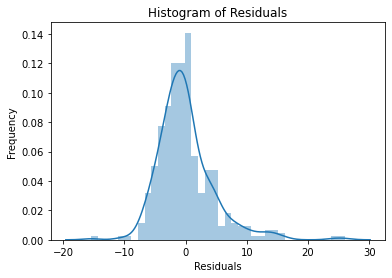

In [33]:
# Checking Normality of errors

sns.distplot(y_train-y_train_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [34]:
# Model predictions on test data
y_test_pred = model.predict(x_test)

In [35]:
# Model evaluation
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}\n')
print(f'MSE: {mean_squared_error(y_test, y_test_pred)}\n')
print(f'r^2 Score: {r2_score(y_test, y_test_pred)}')

MAE: 3.3677910465354417

MSE: 25.4195876588646

r^2 Score: 0.726345144982719


In [36]:
final_result = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
final_result[:20]

,Actual,Predicted
8,16.500000,12.074960
289,24.799999,26.989497
68,17.400000,17.588033
211,19.299999,18.155845
226,37.599998,36.920917
70,24.200001,25.432673
55,35.400002,31.092570
470,19.900000,19.725498
409,27.500000,19.661034
154,17.000000,22.963587
